# Replication Notebook
This notebook contains the code for running the validation examples of seBERT and seWord2Vec as well as computing the differences between the original BERT and seBERT vocabularies and the visualization of the seWord2Vec embeddings.
## Installation of Dependencies
If you do not run this notebook in a separate container or virtual environment or if you use conda instead of pip, you should consider to do this via the command line.

In [2]:
import sys
!{sys.executable} -m pip install torch==1.7.1 beautifulsoup4==4.9.3 scikit-learn==0.24.1 transformers==4.2.2 pandas==1.1.5 seaborn==0.11.0 numpy==1.19.2 matplotlib==3.3.4 gensim==4.0.0b0 tokenizers==0.9.4.

## Import dependencies
We first load all modules we need for our analysis. Do not forget to add the imports to cells, if you copy later code to your own environment.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader
from sklearn.manifold import TSNE
import csv
from tokenizers import BertWordPieceTokenizer
import torch
from transformers import pipeline, BertForMaskedLM, BertTokenizer

## Load the word-embedding models
We load the word2vec model trained on the se data and the glove-wiki-gigaword-300 model. Make sure the files `word2vec.model`, `word2vec.model.wv.vectors.npy` and `word2vec.model.syn1neg.npy` are present in the same directory as this notebook.

In [4]:
se_model = gensim.models.Word2Vec.load('word2vec.model')
wiki_model = gensim.downloader.load('glove-wiki-gigaword-300') 

## Validation examples for se_word2vec
We define validation examples from the software engineering domain and compute the top5 most similar words for the `se_model` and `wiki_model`.

| Word | Expectation |
| -------- | -------- |
| bug | issue | 
| ant | ant build tool |
| class | class (OOP) |
| java + exception | java exceptions | 
| window | window (computing) | 
| argument | parameter, pass |
| python - snake | python (programming language) |
| agile | agile (software development) |
| unit | test |
| 64 | 64-bit (computing) |
| os | operating systems | 
| os + windows - linux | windows os |
| os + linux - windows | linux distributions |
| woman + king - man | queen |
| abort| abort (computing) |
| cookie | web cookie |
| fork | project fork |
| smell | code smell |
| virus | computer virus |
| bug + help + 😀 | neutral |
| bug + help + 😂 | amusement |
| bug + help + 😭 | sadness |
| bug + help + 🤔 | curiosity |
| bug + help + 😕 | frustration |

In [6]:
# we define pairs of lists with positive and negative words for each example
examples  = [
    (['bug'], []),
    (['ant'],[]),
    (['class'],[]),
    (['java', 'exception'],[]),
    (['window'],[]),
    (['argument'],[]),
    (['python'],['snake']),
    (['agile'],[]),
    (['unit'],[]),
    (['64'],[]),
    (['os'],[]),
    (['os', 'windows'],['linux']),
    (['os', 'linux'],['windows']),
    (['woman', 'king'],['man']),
    (['abort'],[]),
    (['cookie'],[]),
    (['fork'],[]),
    (['smell'],[]),
    (['virus'],[]),
    (['bug', 'help', '😀'],[]),
    (['bug', 'help', '😂'],[]),
    (['bug', 'help', '😭'],[]),
    (['bug', 'help', '🤔'],[]),
    (['bug', 'help', '😕'],[]),
]

In [7]:
# we keep both models seperate as they need a lot of ram
# se_model:
for example in examples:
    pos = example[0]
    neg = example[1]
    s = ''
    for i, word in enumerate(pos):
        if i == 0:
            s = s + word
        else:
            s = s + ' + ' + word
    for i, word in enumerate(neg):
            s = s + ' - ' + word
    se_similar = se_model.wv.most_similar(positive=pos, negative=neg, topn=5)
    print('example: ' + s)
    words = []
    prob = []
    for word in se_similar:
        words.append(word[0])
        prob.append(round(word[1],3))
    print(words)
    print(str(prob) + '\n')

example: bug
['bugs', 'issue', 'issues', 'workaround', 'reported']
[0.827, 0.73, 0.714, 0.702, 0.7]

example: ant
['importbuild', 'helloworldwithant', 'pmdtask', 'antscript', 'buildfile']
[0.693, 0.661, 0.66, 0.659, 0.657]

example: class
['classes', 'extends', 'subclass', 'implements', 'methods']
[0.87, 0.773, 0.751, 0.738, 0.736]

example: java + exception
['nullpointerexception', 'at', 'lang', 'thrown', 'illegalargumentexception']
[0.747, 0.74, 0.733, 0.727, 0.724]

example: window
['popup', 'screen', 'pane', 'opens', 'maximized']
[0.744, 0.702, 0.685, 0.683, 0.683]

example: argument
['arguments', 'parameter', 'passed', 'arg', 'passing']
[0.881, 0.823, 0.74, 0.728, 0.709]

example: python - snake
['python3', 'python2', 'pyhon', 'pypi', 'py']
[0.498, 0.452, 0.445, 0.445, 0.426]

example: agile
['scrum', 'methodologies', 'scrumguides', 'tdd', 'bduf']
[0.84, 0.71, 0.698, 0.69, 0.676]

example: unit
['tests', 'test', 'units', 'testing', 'mock']
[0.763, 0.738, 0.703, 0.702, 0.648]

exam

In [8]:
# we keep both models seperate as they need a lot of ram
# wiki_model:
for example in examples:
    pos = example[0]
    neg = example[1]
    s = ''
    for i, word in enumerate(pos):
        if i == 0:
            s = s + word
        else:
            s = s + ' + ' + word
    for i, word in enumerate(neg):
            s = s + ' - ' + word
    print('example: ' + s)
    try:
        wiki_similar = wiki_model.most_similar(positive=pos, negative=neg, topn=5)
    except:
        print('Not in wiki vocabulary.\n')
        continue
    words = []
    prob = []
    for word in wiki_similar:
        words.append(word[0])
        prob.append(round(word[1],3))
    print(words)
    print(str(prob) + '\n')

example: bug
['bugs', 'y2k', 'glitch', 'worm', 'viruses']
[0.689, 0.592, 0.466, 0.457, 0.454]

example: ant
['ants', 'termite', 'termites', 'bees', 'insect']
[0.694, 0.476, 0.456, 0.451, 0.436]

example: class
['classes', 'type', 'school', 'grade', 'students']
[0.712, 0.484, 0.441, 0.441, 0.437]

example: java + exception
['except', 'exceptions', 'example', 'instance', 'only']
[0.557, 0.554, 0.522, 0.508, 0.463]

example: window
['windows', 'door', 'doors', 'glass', 'roof']
[0.686, 0.669, 0.626, 0.553, 0.54]

example: argument
['arguments', 'arguing', 'argued', 'argue', 'assertion']
[0.804, 0.664, 0.634, 0.6, 0.595]

example: python - snake
['monty', 'php', 'javascript', 'c++', 'cleese']
[0.487, 0.409, 0.408, 0.403, 0.385]

example: agile
['nimble', 'skillful', 'adaptable', 'adept', 'resourceful']
[0.663, 0.492, 0.487, 0.467, 0.462]

example: unit
['units', 'division', 'operations', 'subsidiary', 'company']
[0.742, 0.582, 0.575, 0.504, 0.478]

example: 64
['65', '63', '44', '62', '45']

## Defining example words for visualization
We define a list of example words that we use to show the differences between the two models. Words not present in the glove-wiki-gigaword-300 vocabulary will only be visualized for the se-domain model.

| word | se_domain | noise 
| -------- | -------- | -------- |
| ant | ant, build, buildfile | insect, bee |
| bug | bug, issue, workaround, fix, defect, glitch | insect, bee |
| os | 32, 64, 32bit, 64bit, x86, os, windows7, windows10, linux, ubuntu, debian, arch, centos 	| 63, 65 |
| virus | virus, malware, trojan, antivirus, worm |  |
| cookie | cookie, session, browser, auth, login | dough, cake, baking, chocolate |
| class | class, extends, subclass, super, implements, method, oop |  |
| github |github, repo, repository, commit, pull, pr, git, fork |  |

In [9]:
words = ['64', 'bug', 'issue', 'workaround', 'fix', 'worm', 
         'virus', 'glitch', 'ant', 'insect', 'bee', 'defect', 
         'buildfile', 'build', 'os', 'windows7', 'windows10', 
         'linux', 'ubuntu', 'debian', 'arch', 'centos', '63', 
         '65', '32', 'x86', '64bit', '32bit', 'github', 'repo', 
         'repository', 'commit', 'pull', 'pr', 'git', 'class', 
         'extends', 'subclass', 'super', 'implements', 'method', 
         'oop', 'malware', 'trojan', 'cookie', 'dough', 'cake', 
         'baking', 'chocolate', 'session', 'browser', 'auth', 
         'login', 'fork', 'antivirus']

## Visualisation of the glove-wiki-gigaword-300 embeddings (t-SNE)
We visualize the words using the `wiki-model` and t-SNE.

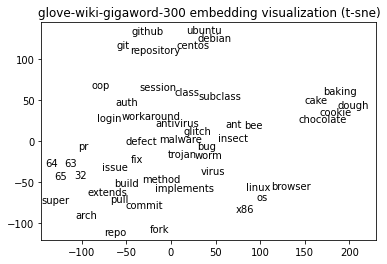

In [11]:
embeddings = {}
for word in words:
    # check if embedding for the given word exists (false for 32bit, 64bit, windows7, windows10, buildfile)
    if word in wiki_model.key_to_index:
        embeddings[word] = wiki_model[word]
wiki_df = pd.DataFrame.from_dict(embeddings, orient='index')

# since we display the words and not their points in the two-dimensional space, some words might overlap. 
# to improve the readability we move these words slightly apart using offsets
offsets = {
    'debian': (0,7),
    'chocolate': (0, -4),
    'bug': (0, -2),
    'worm': (4, 0),
    'cookie': (0, -2),
    'chocolate': (0,-7),
    'subclass': (2,0),
    'class': (1,0),
    'bug': (0,-7),
    'malware': (0,-4),
    'glitch': (0,-2),
    'extends': (0,6),
    'pull': (0,-2)
}

tsne = TSNE(n_components=2, random_state=0, perplexity=11)
tsne_res = tsne.fit_transform(wiki_df)
plt.figure()
# alpha=0.0 to hide markers
ax = sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], alpha=0.0)
# x and y limits determined by trial and error
ax.set_xlim((-145,230))
ax.set_ylim((-120,145))
ax.set(title='glove-wiki-gigaword-300 embedding visualization (t-sne)')
# add words to the plot
for i, key in enumerate(embeddings.keys()):
    if key in offsets.keys():
        ax.text(x=tsne_res[i][0]+offsets[key][0], y=tsne_res[i][1]+offsets[key][1], s=key, fontdict=dict(color='black',size=10))
    else:
        ax.text(x=tsne_res[i][0], y=tsne_res[i][1], s=key, fontdict=dict(color='black',size=10))
fig = ax.get_figure()
fig.savefig("glove_wiki_gigaword_300_t-sne.png")

## Visualisation of the se-word2vec embeddings (t-SNE)
We visualize the words using the `se-model` and t-SNE.

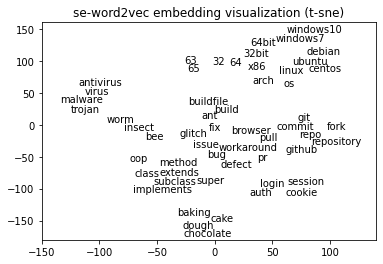

In [13]:
embeddings = {}
for word in words:
    embeddings[word] = se_model.wv[word]
se_df = pd.DataFrame.from_dict(embeddings, orient='index')

# since we display the words and not their points in the two-dimensional space, some words might overlap. 
# to improve the readability we move these words slightly apart using offsets
offsets = {
    'auth': (0, -5),
    'baking': (-3, 0),
    'session': (0, -3),
    'class': (-10, -5),
    'extends': (31,5),
    'windows7': (0,-2),
    'windows10': (0,4),
    'ant': (0,-17),
    'bug': (0,2),
    'virus': (5,12),
    '32bit': (5,-15),
    'fix': (0,15),
    'pull': (0,-2),
    'pr': (5,-6),
    'build': (0,15),
    'debian': (0,8),
    'dough': (-2,-8),
    'chocolate': (0,-4),
    '64bit': (0,10),
    'super': (19,-12),
    'implements': (0,-10),
    'git': (0,10),
    'pull': (0,10),
    'glitch': (0, 10),
    'issue': (-7,0),
    'antivirus': (0,12),
    'bee': (0,-4),
    'browser': (0,4),
    'cake': (2,0),
    'github': (0,-5),
    'repository': (0,-3),
    'session': (3,0)
}

tsne = TSNE(n_components=2, random_state=0, perplexity=11)
tsne_res = tsne.fit_transform(se_df)
plt.figure()
# alpha=0.0 to hide markers
ax = sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], alpha=0.0)
# x and y limits determined by trial and error
ax.set_xlim((-150,140))
ax.set_ylim((-180,160))
ax.set(title='se-word2vec embedding visualization (t-sne)')
# add words to the plot
for i, key in enumerate(embeddings.keys()):
    if key in offsets.keys():
        ax.text(x=tsne_res[i][0]+offsets[key][0], y=tsne_res[i][1]+offsets[key][1], s=key, fontdict=dict(color='black',size=10))
    else:
        ax.text(x=tsne_res[i][0], y=tsne_res[i][1], s=key, fontdict=dict(color='black',size=10))
fig = ax.get_figure()
fig.savefig("se-word2vec-t-sne.png")

## Comparison of BERT and seBERT vocabulary
We compare the vocabulary of the original BERT with the vocabulary trained on the se data. Make sure that both vocabulary files exist in the same directory as this notebook.

In [32]:
# read in the vocabularies
BERT_vocab = []
with open("BERT_vocab.txt") as vocab:
    BERT_vocab = vocab.readlines()
seBERT_vocab = []
with open("seBERT_vocab.txt") as vocab:
    seBERT_vocab = vocab.readlines()
    
# initialize the tokenizers
BERT_tokenizer = BertWordPieceTokenizer.from_file("BERT_vocab.txt")
seBERT_tokenizer = BertWordPieceTokenizer.from_file("seBERT_vocab.txt")

# creates a csv file with the words only in vocab_a but not in vocab_b
# additionally tokenizes such words with the tokenizer of vocab_b
def compare_vocabs(vocab_a, vocab_b, name_a, name_b, tokenizer):
    assert len(vocab_a) == len(vocab_b)
    diff = []
    #header row
    diff.append(['wordpiece', 'tokenized by ' + name_b])
    unique_tokens = 0
    with open('diff_' + name_a + '_' + name_b + '.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='"')
        for token in vocab_a:
            tok = token.replace('\n', '')
            if token not in vocab_b:
                unique_tokens = unique_tokens + 1
                # for readability we are interested wordpieces that are the start of a word,
                # i.e. wordpieces that do not begin with ##
                if '#' not in token:
                    encoding = ' '.join(map(str, tokenizer.encode(token).tokens))
                    encoding = encoding.replace('[CLS] ', '')
                    encoding = encoding.replace(' [SEP]', '')
                    diff.append([tok, encoding])
        writer.writerows(diff)
    print(str(len(diff)) + ' unique start wordpieces in ' + name_a + ' and ' + str(unique_tokens-len(diff)) + ' ending wordpieces (##).')
    return unique_tokens
    
unique_BERT = compare_vocabs(BERT_vocab, seBERT_vocab, "BERT", "seBERT", seBERT_tokenizer)
unique_seBERT = compare_vocabs(seBERT_vocab, BERT_vocab, "seBERT", "BERT", BERT_tokenizer)
similiarity = (len(BERT_vocab)-unique_BERT)/len(BERT_vocab)
assert similiarity == (len(seBERT_vocab)-unique_seBERT)/len(seBERT_vocab)
print(str(similiarity) + ' wordpiece similarity, between the vocabularies.')

df_bert_se = pd.read_csv('diff_BERT_seBERT.csv')
display(df_bert_se.tail())
df_se_bert = pd.read_csv('diff_seBERT_BERT.csv')
display(df_se_bert.tail())

15551 unique start wordpieces in BERT and 3285 ending wordpieces (##).
11406 unique start wordpieces in seBERT and 7430 ending wordpieces (##).
0.3828713714697595 wordpiece similarity, between the vocabularies.


,wordpiece,tokenized by seBERT
15545,nitrate,nit ##rate
15546,salamanca,sal ##aman ##ca
15547,scandals,scan ##dal ##s
15548,thyroid,thy ##roid
15549,necessitated,necess ##itate ##d


,wordpiece,tokenized by BERT
11400,emr,em ##r
11401,02mb,02 ##mb
11402,fanboy,fan ##boy
11403,modulus,mod ##ulus
11404,1156,115 ##6


## Load BERT and seBERT models
Make sure the seBERT directory is present in the same directory as this notebook. The seBERT directory must include the files: `bert_config.json`, `model.ckpt.data-00000-of-00001`, `model.ckpt.index`, `model.ckpt.meta` and `vocab.txt`.

In [4]:
seBERT = BertForMaskedLM.from_pretrained('seBERT/model.ckpt.index', config='seBERT/bert_config.json', from_tf=True)
BERT = BertForMaskedLM.from_pretrained('bert-large-uncased')

# initialize the tokenizers
seBERT_bert_tokenizer = BertTokenizer.from_pretrained('seBERT/vocab.txt')
BERT_bert_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

# we use a pipeline for mlm
nlp_seBERT = pipeline("fill-mask", model=seBERT, tokenizer=seBERT_bert_tokenizer)
nlp_BERT = pipeline("fill-mask", model=BERT, tokenizer=BERT_bert_tokenizer)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated


## Validation examples seBERT
We provide three categories of mlm validation examples for seBERT:
- Positive examples: Software engineering domain words in a software engineering context. 
- Negative examples Software engineering domain words in a non software engineering context.
- Neutral examples: Non software engineering domain sentences, which could still be on Github or Stack Overflow or inferred from context.

### Positive examples:
| Nr | Sentence | Expectation |
| -------- | -------- | -------- |
| 1 | The \[MASK\] is thrown when an application attempts to use null in a case where an object is required.      | NullPointerException     |
| 2 | \[MASK\] is a proprietary issue tracking product developed by Atlassian that allows bug tracking and agile project management. | Jira |
| 3 | \[MASK\] is a software tool for automating software build processes. | build automation tools |
| 4 | \[MASK\] is a software tool for automating software build processes which originated from the Apache Tomcat project in early 2000 as a replacement for the Make build tool of Unix. It is similar to Make, but is implemented using the Java language and requires the Java platform. | Ant |
| 5 | \[MASK\] is an issue tracking system. | issue tracking systems |
| 6 | Pathlib is a python library used for handeling \[MASK\]. | paths | 
| 7 | The solution posted by \[USER\] is \[MASK\] helpful. :) | positive adverb | 
| 8 | The solution posted by \[USER\] is \[MASK\] helpful. :( | negative adverb |
| 9 | \[MASK\], is a provider of Internet hosting for software development and version control using Git. | github, gitlab | 
| 10 | In object-oriented programming, a \[MASK\] is an extensible program-code-template for creating objects. | class |
| 11 | We found this \[MASK\] bug through pure chance. | adjective regarding severity or bug type | 
| 12 | I have to discuss this with the other \[MASK\]. | developers |
| 13 | This is a \[MASK\] bug, please adress it asap. | critical, major | 
| 14 | It's not a \[MASK\]. It's an undocumented feature. | bug | 
| 15 | \[MASK\] up. 👍 | thumbs |
| 16 | This is \[MASK\] 😀. | neutral adjective | 
| 17 | This is \[MASK\] 😂. | adj. associated with amusement |
| 18 | This is \[MASK\] 😭. | adj. associated with sadness |
| 19 | This is \[MASK\] 🤔. | adj. associated with curiosity | 
| 20 | This is \[MASK\] 😕. | adj. associated with annoyance | 
| 21 | Tools such as Checkstyle, PMD, FindBugs, and SonarQube can automatically identify \[MASK\] smell. | smell |

### Negative examples:
| Nr | Sentence | Expectation |
| -------- | -------- | -------- |
| 1 | A \[MASK\] crawled across her leg, and she swiped it away. | bug | 
| 2 | \[MASK\] is an island of Indonesia, bordered by the Indian Ocean on the south and the Java Sea on the north. With a population of over 148 million (Java only) or 152 million (including the inhabitants of its surrounding islands). | Java | 
| 3 | Can you open the \[MASK\], please? It's hot in here. | window, door | 
| 4 | The reticulated python is among the few \[MASK\] that prey on humans. | snakes | 
| 5 | "I have a \[MASK\] request for you." He said to the waiter. | special | 
| 6 | He was admitting to a \[MASK\] he didn't commit, knowing it was somebody else who did it. | crime | 
| 7 | There was not a single cloud in the \[MASK\] | sky | 
| 8 | It's an incurable, terminal \[MASK\]. | disease | 
| 9 | The dentist said I need to have a root \[MASK\]. | canal | 
| 10 | Everything was covered with a fine layer of \[MASK\]. | dust, snow | 
| 11 | Sorry, I can't come to work today. My \[MASK\] caught a virus. | family member | 
| 12 | My \[MASK\] had an abortion. | female noun | 
| 13 | What does it say in your \[MASK\] cookie? | fortune | 
| 14 | Stop eating with your \[MASK\], use your fork! | hands, fingers | 


### Neutral examples:
| Nr | Sentence | Expectation |
| -------- | -------- | -------- | 
| 1 | We can \[MASK\] in person if you have any specific questions. | meet | 
| 2 | Firstly, you should make sure that the word is actually in the dictionary. \[MASK\], you should make sure that the word is spelled correctly. | secondly | 
| 3 | \[MASK\] its name, vitamin D is not a vitamin. Instead, it is a hormone that promotes the absorption of calcium in the body. | despite | 
| 4 | Would all those in favour please raise their \[MASK\]? | hands |
| 5 | She surprised him with a \[MASK\]. | smile, kiss | 
| 6 | Whoever is happy will make others \[MASK\] too. | happy |
| 7 | If there are night owls, are there \[MASK\] owls too? | day |
| 8 | Never forget, always remember. Always forget, never \[MASK\]. | remember |
| 9 | If you are counting things, start from \[MASK\]. | 1, one |
| 10 | Soccer has really simple rules. It’s not \[MASK\] science. | rocket |
| 11 | First, I drink a cup of coffee and make breakfast. Then I usually read the \[MASK\]. | newspaper |
| 12 | He ran out of \[MASK\], so he had to stop playing poker. | money, time |

In [5]:
positive = [
    'The [MASK] is thrown when an application attempts to use null in a case where an object is required.',
    '[MASK] is a proprietary issue tracking product developed by Atlassian that allows bug tracking and agile project management.',
    '[MASK] is a software tool for automating software build processes.',
    '[MASK] is a software tool for automating software build processes which originated from the Apache Tomcat project in early 2000 as a replacement for the Make build tool of Unix. It is similar to Make, but is implemented using the Java language and requires the Java platform.',
    '[MASK] is an issue tracking system.',
    'Pathlib is a python library used for handeling [MASK].',
    'The solution posted by [USER] is [MASK] helpful. :)',
    'The solution posted by [USER] is [MASK] helpful. :(',
    '[MASK], is a provider of Internet hosting for software development and version control using Git.',
    'In object-oriented programming, a [MASK] is an extensible program-code-template for creating objects.',
    'We found this [MASK] bug through pure chance.',
    'I have to discuss this with the other [MASK].',
    'This is a [MASK] bug, please adress it asap.',
    'It\'s not a [MASK]. It\'s an undocumented feature.',
    '[MASK] up. 👍',
    'This is [MASK] 😀.', 
    'This is [MASK] 😂.',
    'This is [MASK] 😭.',
    'This is [MASK] 🤔.',
    'This is [MASK] 😕.',
    'Tools such as Checkstyle, PMD, FindBugs, and SonarQube can automatically identify [MASK] smell.'    
]

negative = [
    'A [MASK] crawled across her leg, and she swiped it away.',
    '[MASK] is an island of Indonesia, bordered by the Indian Ocean on the south and the Java Sea on the north. With a population of over 148 million (Java only) or 152 million (including the inhabitants of its surrounding islands).',
    'Can you open the [MASK], please? It\'s hot in here.', 
    'The reticulated python is among the few [MASK] that prey on humans.',
    '\"I have a [MASK] request for you.\" He said to the waiter.',
    'He was admitting to a [MASK] he didn\'t commit, knowing it was somebody else who did it.',
    'There was not a single cloud in the [MASK]',
    'It\'s an incurable, terminal [MASK].',
    'The dentist said I need to have a root [MASK].',
    'Everything was covered with a fine layer of [MASK].',
    'Sorry, I can\'t come to work today. My [MASK] caught a virus.',
    'My [MASK] had an abortion.',
    'What does it say in your [MASK] cookie?',
    'Stop eating with your [MASK], use your fork!',
]

neutral = [
    'We can [MASK] in person if you have any specific questions.',
    'Firstly, you should make sure that the word is actually in the dictionary. [MASK], you should make sure that the word is spelled correctly.',
    '[MASK] its name, vitamin D is not a vitamin. Instead, it is a hormone that promotes the absorption of calcium in the body.',
    'Would all those in favour please raise their [MASK]?',
    'She surprised him with a [MASK].',
    'Whoever is happy will make others [MASK] too.',
    'If there are night owls, are there [MASK] owls too?',
    'Never forget, always remember. Always forget, never [MASK].',
    'If you are counting things, start from [MASK].',
    'Soccer has really simple rules. It’s not [MASK] science.',
    'First, I drink a cup of coffee and make breakfast. Then I usually read the [MASK].',
    'He ran out of [MASK], so he had to stop playing poker.'
]

### Run the examples

In [25]:
def run_examples(examples):
    for example in examples:
        print('Example: ' + example)
        seBERT_result = nlp_seBERT(example)
        BERT_result = nlp_BERT(example)
        tokens_BERT = [x['token_str'] for x in BERT_result]
        tokens_seBERT = [x['token_str'] for x in seBERT_result]
        scores_BERT = [round(x['score'],4) for x in BERT_result]
        scores_seBERT = [round(x['score'],4) for x in seBERT_result]
        print('Most probable sequence BERT: ' + BERT_result[0]['sequence'])
        print('Tokens: ' + str(tokens_BERT))
        print('Scores: ' + str(scores_BERT))
        print('Most probable sequence seBERT: ' + seBERT_result[0]['sequence'])
        print('Tokens: ' + str(tokens_seBERT))
        print('Scores: ' + str(scores_seBERT) + '\n')

In [26]:
run_examples(positive)

Example: The [MASK] is thrown when an application attempts to use null in a case where an object is required.
Most probable sequence BERT: [CLS] the value is thrown when an application attempts to use null in a case where an object is required. [SEP]
Tokens: ['value', 'exception', 'coin', 'ball', 'flag']
Scores: [0.2356, 0.0804, 0.0342, 0.0318, 0.0312]
Most probable sequence seBERT: [CLS] the exception is thrown when an application attempts to use null in a case where an object is required. [SEP]
Tokens: ['exception', 'error', 'nullpointerexception', 'npe', 'illegalargumentexception']
Scores: [0.5473, 0.2188, 0.1158, 0.0291, 0.0144]

Example: [MASK] is a proprietary issue tracking product developed by Atlassian that allows bug tracking and agile project management.
Most probable sequence BERT: [CLS] it is a proprietary issue tracking product developed by atlassian that allows bug tracking and agile project management. [SEP]
Tokens: ['it', 'bug', 'eclipse', 'echo', 'spark']
Scores: [0.0

In [27]:
run_examples(negative)

Example: A [MASK] crawled across her leg, and she swiped it away.
Most probable sequence BERT: [CLS] a bug crawled across her leg, and she swiped it away. [SEP]
Tokens: ['bug', 'spider', 'tear', 'flea', 'fly']
Scores: [0.2087, 0.1676, 0.1463, 0.048, 0.0447]
Most probable sequence seBERT: [CLS] a man crawled across her leg, and she swiped it away. [SEP]
Tokens: ['man', 'person', 'friend', 'girl', 'monkey']
Scores: [0.1042, 0.0518, 0.0472, 0.0299, 0.0248]

Example: [MASK] is an island of Indonesia, bordered by the Indian Ocean on the south and the Java Sea on the north. With a population of over 148 million (Java only) or 152 million (including the inhabitants of its surrounding islands).
Most probable sequence BERT: [CLS] java is an island of indonesia, bordered by the indian ocean on the south and the java sea on the north. with a population of over 148 million ( java only ) or 152 million ( including the inhabitants of its surrounding islands ). [SEP]
Tokens: ['java', 'indonesia', 'su

In [28]:
run_examples(neutral)

Example: We can [MASK] in person if you have any specific questions.
Most probable sequence BERT: [CLS] we can meet in person if you have any specific questions. [SEP]
Tokens: ['meet', 'speak', 'talk', 'discuss', 'communicate']
Scores: [0.695, 0.1173, 0.1026, 0.0208, 0.0057]
Most probable sequence seBERT: [CLS] we can chat in person if you have any specific questions. [SEP]
Tokens: ['chat', 'talk', 'discuss', 'meet', 'speak']
Scores: [0.5492, 0.1941, 0.1025, 0.0913, 0.0064]

Example: Firstly, you should make sure that the word is actually in the dictionary. [MASK], you should make sure that the word is spelled correctly.
Most probable sequence BERT: [CLS] firstly, you should make sure that the word is actually in the dictionary. secondly, you should make sure that the word is spelled correctly. [SEP]
Tokens: ['secondly', 'second', '2nd', 'also', 'then']
Scores: [0.9805, 0.0162, 0.0011, 0.001, 0.0003]
Most probable sequence seBERT: [CLS] firstly, you should make sure that the word is ac